# FINAL - Airbnb

# 1. Datasets

In [ ]:
#dfcalr = raw calenar unico; original
#dfl1r = raw listing: misma cantidad filas, menos columnas; original
#dfl2r = raw listing: misma cantidad filas, más columnas; original

#dfcalc = clean calenar unico; con Selección de Variables
#dfl1c = clean listing: misma cantidad filas, menos columnas; con Selección de Variables
#dfl2c = clean listing: misma cantidad filas, más columnas; con Selección de Variables

#dfcalf = fixed calenar unico ; sin repetidos, sin NaN, , Nombre Columnas; sin outliers


# 2. Install, Import and Read

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install pandas-profiling
!pip install squarify
!pip install pycaret
!pip install mlflow
!pip install --upgrade scikit-learn pycaret
!pip install --upgrade pycaret
!pip list | grep pycaret
!pip list | grep mlflow
!pip list | grep matplotlib
!pip list | grep scikit-learn

In [ ]:
from pandas_profiling import ProfileReport

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import math
import squarify
import pycaret
import sklearn


In [2]:
dfl1r = pd.read_csv(r"listings1.csv", delimiter= ",")
dfl2r = pd.read_csv(r"listings1.csv", delimiter= ",")
dfcalr = pd.read_csv(r"calendar.csv", delimiter= ",")
dfrevr = pd.read_csv(r"reviews.csv", delimiter= ",")

# 3. Exploratory Data Analysis

In [ ]:
profile = ProfileReport(dfl1r)
profile.to_file("dfl1r profile.html")

In [ ]:
profile = ProfileReport(dfl2r)
profile.to_file("dfl2r profile.html")

In [ ]:
profile = ProfileReport(dfcalr)
profile.to_file("dfcalr profile.html")

In [ ]:
duplicados = dfl1r['neighbourhood_group'].duplicated()
duplicados.sum()

# 4. Data Cleaning

#### Missing values, duplicates, define and transform variables.

## 4.1. DF Calendar

In [3]:
dfcalr['price'] = dfcalr['price'].replace('[\$,]', '', regex=True).astype(float)
dfcalr['adjusted_price'] = dfcalr['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)
dfcalr['price_difference'] = dfcalr['adjusted_price'] - dfcalr['price']
dfcalr.rename(columns={'listing_id': 'id'}, inplace=True)
dfcalr['date'] = pd.to_datetime(dfcalr['date'])
dfcalr['available'] = dfcalr['available'].replace({"t": True, "f": False})
dfcalr['available'].iloc[10:15]

10    False
11    False
12    False
13     True
14     True
Name: available, dtype: bool

In [4]:
dfcalc = dfcalr.dropna(subset=["price", "adjusted_price", "minimum_nights", "maximum_nights", "price_difference"])
dfcalc = dfcalc.loc[~((dfcalc['price'] == 0) | (dfcalc['adjusted_price'] == 0))]
dfcalc.shape

(8461978, 8)

In [5]:
def eliminar_outliers(df, columna):
    Q1 = np.percentile(df[columna], 25)
    Q3 = np.percentile(df[columna], 75)
    IQR = Q3 - Q1
    umbral_superior = Q3 + 1.5 * IQR
    mascara_observaciones_altas = df[columna] > umbral_superior
    df_sin_outliers = df[~mascara_observaciones_altas]
    return df_sin_outliers

# Lista de columnas
columnas_interes = ['price', 'adjusted_price', 'minimum_nights', 'maximum_nights']

# Aplicar la función a cada columna
dfcalf = dfcalc.copy()  # Crear una copia para mantener el DataFrame original
for columna in columnas_interes:
    dfcalf = eliminar_outliers(dfcalf, columna)

# Mostrar el DataFrame resultante
print(dfcalf.shape)

(6669091, 8)


***Further Calculations for descritpive analysis***

In [ ]:
dfcalr.shape

In [ ]:
dfcalr.dtypes

In [ ]:
# Obtener la cantidad de filas en el DataFrame filtrado
    #cantidad_filas = filtered_df.shape[0]

# Mostrar la cantidad de filas
    #print("Cantidad de filas con 'price_difference' distinto de 0:", cantidad_filas)

In [ ]:
dfcalr.dtypes

In [ ]:
dfcalr.isnull().sum()

In [ ]:
dfcalc.isnull().sum()

In [ ]:
#dfcalc = dfcalr.drop(["minimum_nights", "maximum_nights"], axis=1)

In [ ]:
#pd.options.display.float_format = None
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
dfcalc.describe()

In [ ]:
dfcalc.boxplot('price')
dfcalc.set_title('Boxplot de Price')
dfcalc.set_ylim(-100000, 300000)
plt.show()

In [ ]:
dfcalc['id'].duplicated().sum()

In [ ]:
# dfcalc[dfcalc['price']>140000]

In [ ]:
plt.hist(dfcalf['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frecuencia')
plt.title("Histograma Precio")
plt.show()

In [ ]:
dfcalf.describe()

In [ ]:
dfl1c.info()

In [ ]:
profile = ProfileReport(dfcalf)
profile.to_file("dfcalf profile.html")

## 4.2. DF Listing 1 (Summary)

In [6]:
dfl1r.shape

(23185, 18)

In [7]:
dfl1r['last_review'] = pd.to_datetime(dfl1r['last_review'])

In [8]:
dfl1r = dfl1r.drop(["name", "license", "neighbourhood_group", "host_name"], axis=1)
#dfl1cf = dfl1r.dropna(subset=["last_review", "reviews_per_month"])

In [9]:
def eliminar_outliers(df, columna):
    Q1 = np.percentile(df[columna], 25)
    Q3 = np.percentile(df[columna], 75)
    IQR = Q3 - Q1
    umbral_superior = Q3 + 1.5 * IQR
    mascara_observaciones_altas = df[columna] > umbral_superior
    df_sin_outliers = df[~mascara_observaciones_altas]
    return df_sin_outliers

# Lista de columnas
columnas_interes = ['price']

# Aplicar la función a cada columna
dfl1c = dfl1r.copy()  # Crear una copia para mantener el DataFrame original
for columna in columnas_interes:
    dfl1c = eliminar_outliers(dfl1c, columna)

# Mostrar el DataFrame resultante
print(dfl1c.shape)


(21402, 14)


In [10]:
dfl1c.rename(columns={'price': 'price_summary',
                             'minimum_nights': 'min_night_summary'}, inplace=True)
dfl1f = dfl1c
dfl1f[0:1]

,id,host_id,neighbourhood,latitude,longitude,room_type,price_summary,min_night_summary,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,10803,38901,Moreland,-37.76606,144.97951,Private room,49,5,173,2023-07-19,1.33,1,201,21


***Further analysis***

In [ ]:
dfl1r.shape

In [ ]:
dfl1r[5:8]

In [ ]:
dfl1r.dtypes

In [ ]:
dfl1r.isnull().sum()

In [ ]:
dfl1c.isnull().sum()

In [ ]:
dfl1c.shape

In [ ]:
dfl1c.describe()

In [ ]:
dfl1c[dfl1c['calculated_host_listings_count'] == 327]
# dfl1c[dfl1c['host_id'] == 50121][['calculated_host_listings_count', 'neighbourhood', 'host_id']].count()

In [ ]:
plt.hist(dfl1c["calculated_host_listings_count"], bins=327, color='black', edgecolor='red')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frecuencia')
plt.title("Histograma Cantidad de Listings por HostID")
%time plt.show()

In [ ]:
plt.hist(dfl1c['price'])
plt.show()

In [ ]:
plt.hist(dfl1f['calculated_host_listings_count'])
plt.show()

In [ ]:
dfl1f.describe()

In [ ]:
profile = ProfileReport(dfl1f)
profile.to_file("dfl1f profile.html")

## 4.3. DF Listing 1 (Detail)

In [11]:
dfl2r.shape

(23185, 18)

In [12]:
dfl2r.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [13]:
dfl2r[1:2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,12936,Rental unit in St Kilda · ★4.68 · 1 bedroom · ...,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2020-03-15,0.26,10,0,0,NaN


In [14]:
dfl2r['id'].count()

23185

In [15]:
dfl1r['id'].count()

23185

# 5. RFM

## 5.1. Create RFM 

***Note: not all listings require to leave a comment after***

In [16]:
#Recency: +1 day maxdate - last date available false (condition date)***
#Frequency: groupby id w/ availability == False . count
#Monetary: price conditioned per availability)

In [17]:
dfcalf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6669091 entries, 0 to 8462162
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   date              datetime64[ns]
 2   available         bool          
 3   price             float64       
 4   adjusted_price    float64       
 5   minimum_nights    float64       
 6   maximum_nights    float64       
 7   price_difference  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 413.4 MB


In [18]:
print('dfcalendar tiene fechas desde {} hasta {}'.format(dfcalc['date'].min(), dfcalc['date'].max()))
print('dflisting tiene fechas desde {} hasta {}'.format(dfl1c['last_review'].min(), dfl1c['last_review'].max()))


dfcalendar tiene fechas desde 2023-09-04 00:00:00 hasta 2024-09-03 00:00:00
dflisting tiene fechas desde 2013-09-16 00:00:00 hasta 2023-09-05 00:00:00


In [19]:
snapshot_date = dfcalc['date'].max() + timedelta(days=1)
print(snapshot_date)

2024-09-04 00:00:00


In [20]:
dfcalf['price_condicionado'] = np.where(dfcalf['available'], 0, dfcalf['adjusted_price'])
dfcalf['price_condicionado'][0:2]

0    49.0
1    49.0
Name: price_condicionado, dtype: float64

In [21]:
dfcalf['min_date'] = pd.to_datetime(dfcalf['date'].min())
dfcalf['original_date'] = pd.to_datetime(dfcalf['date'])

In [22]:
dfcalf['date_condicionado'] = np.where(dfcalf['available'], dfcalf['min_date'], dfcalf['original_date'])
dfcalf['date_condicionado'][0:2]
#np.where(condición, x, y) condición que se evalúa. Si es verdadera, se selecciona el valor de x; de lo contrario, se selecciona el valor de y.

0   2023-09-05
1   2023-09-06
Name: date_condicionado, dtype: datetime64[ns]

In [23]:
data_process_0 = dfcalf.groupby('id').agg({
    'date_condicionado': lambda x: (snapshot_date - x.max()).days,
    'available': lambda x: (x == False).sum(),  # Contar las veces que 'available' es False
    'price_condicionado': 'sum',
    'price': 'max'
      })

In [24]:
data_process_0[:5]

,date_condicionado,available,price_condicionado,price
id,,,,
10803,1,164,8050.0,60.0
12936,1,365,50265.0,160.0
38271,177,40,4665.0,150.0
43429,164,44,5418.0,178.0
44082,2,206,18334.0,89.0


In [25]:
data_process = data_process_0.copy()


In [26]:
data_process.drop('price', axis=1, inplace=True)

In [27]:
# Cambiar el nombre a las columnas creadas en el paso anterior
data_process.rename(columns={'date_condicionado': 'Recency',
                             'available': 'Frequency',
                             'price_condicionado': 'Monetary'}, inplace=True)
data_process[0:1]

,Recency,Frequency,Monetary
id,,,
10803,1,164,8050.0


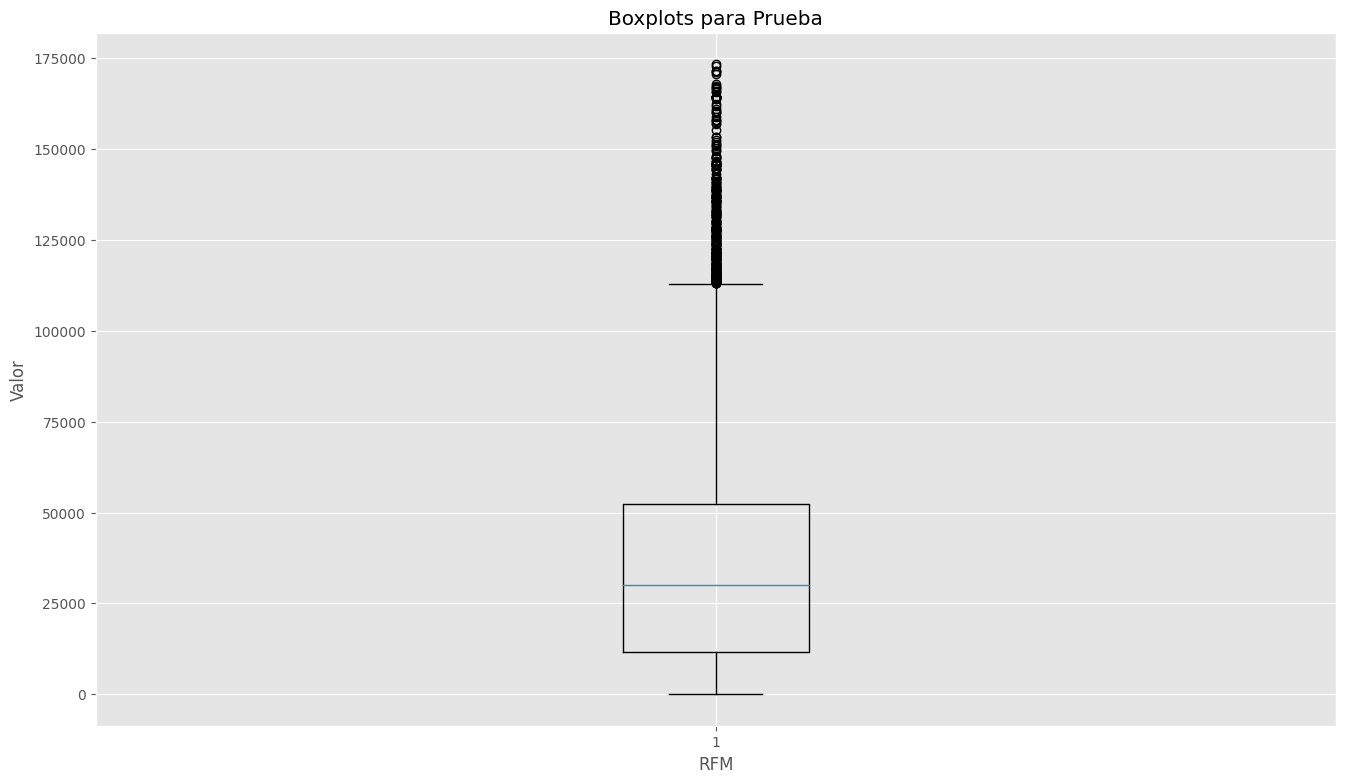

In [28]:
plt.boxplot(data_process['Monetary'])

# Agregar etiquetas y título
plt.xlabel('RFM')
plt.ylabel('Valor')
plt.title('Boxplots para Prueba')

# Mostrar el boxplot
plt.show()

In [29]:
r_labels = [0, 90, 180, 270, 370]
r_groups = pd.cut(data_process['Recency'], bins=r_labels, labels=[4, 3, 2, 1])

In [30]:
f_labels = [-1, 90, 180, 270, 370]
f_groups = pd.cut(data_process['Frequency'], bins=f_labels, labels=[1, 2, 3, 4])

In [31]:
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process[2030:2036]

,Recency,Frequency,Monetary,R,F
id,,,,,
12874451,1,365,41188.0,4,4
12874677,268,11,3850.0,2,1
12875247,1,365,70080.0,4,4
12887796,366,0,0.0,1,1
12890349,1,328,52143.0,4,4
12892260,1,261,22620.0,4,3


In [32]:
# Crear la etiqueta para Monto
m_labels = range(1, 5)
# Asignar la etiqueta al cuartil correspondiente
m_groups = pd.qcut(data_process['Monetary'], q=4, labels=m_labels)
# Crear la nueva columna M
data_process = data_process.assign(M = m_groups.values)
data_process[1030:1036]

,Recency,Frequency,Monetary,R,F,M
id,,,,,,
7776490,1,365,20075.0,4,4,2
7778211,164,47,4465.0,3,1,1
7779973,199,54,10800.0,2,1,1
7813200,1,365,25550.0,4,4,2
7827506,1,365,54750.0,4,4,4
7827987,366,0,0.0,1,1,1


In [33]:
# Crear la columna RFM al concatenar la recencia, frecuencia y monto con la cual realizaremos el ranking
data_process['RFM_Concat'] = data_process.R.astype(str) + data_process.F.astype(str) + data_process.M.astype(str)
rfm = data_process

In [34]:
rfm_count_unique = rfm.groupby('RFM_Concat')['RFM_Concat'].nunique()
print(rfm_count_unique.sum())

44


In [35]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

id
10803     7
12936    11
38271     5
43429     5
44082     9
Name: RFM_Score, dtype: int64


In [36]:
pd.options.display.float_format = '{:.2f}'.format

In [37]:
rfm['RFM_Score'].describe()

count   19591.00
mean        8.72
std         3.09
min         3.00
25%         6.00
50%        10.00
75%        11.00
max        12.00
Name: RFM_Score, dtype: float64

## 5.2. Segment by RFM score

In [38]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'MVP'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Sub-Campeon'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Bronce'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Cuarto Finalista'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Resagado'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Ajustable'
    else:
        return 'Requieren Activacion'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Concat,RFM_Score,RFM_Level
id,,,,,,,,,
10803,1,164,8050.00,4,2,1,421,7,Bronce
12936,1,365,50265.00,4,4,3,443,11,MVP
38271,177,40,4665.00,3,1,1,311,5,Resagado
43429,164,44,5418.00,3,1,1,311,5,Resagado
44082,2,206,18334.00,4,3,2,432,9,MVP


In [39]:
# Calcular los promedios y conteos de segmento por cada nivel de RFM
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary       
                        mean      mean     mean  count
RFM_Level                                             
Ajustable             220.20     30.00  6002.90    958
Bronce                106.40    111.00 19091.10    736
Cuarto Finalista      115.60     63.40 13580.50    923
MVP                     3.50    304.50 49262.20  12687
Requieren Activacion  341.20     11.40  2043.40   2186
Resagado              173.80     41.90  7395.70   1344
Sub-Campeon            45.50    139.70 24785.40    757

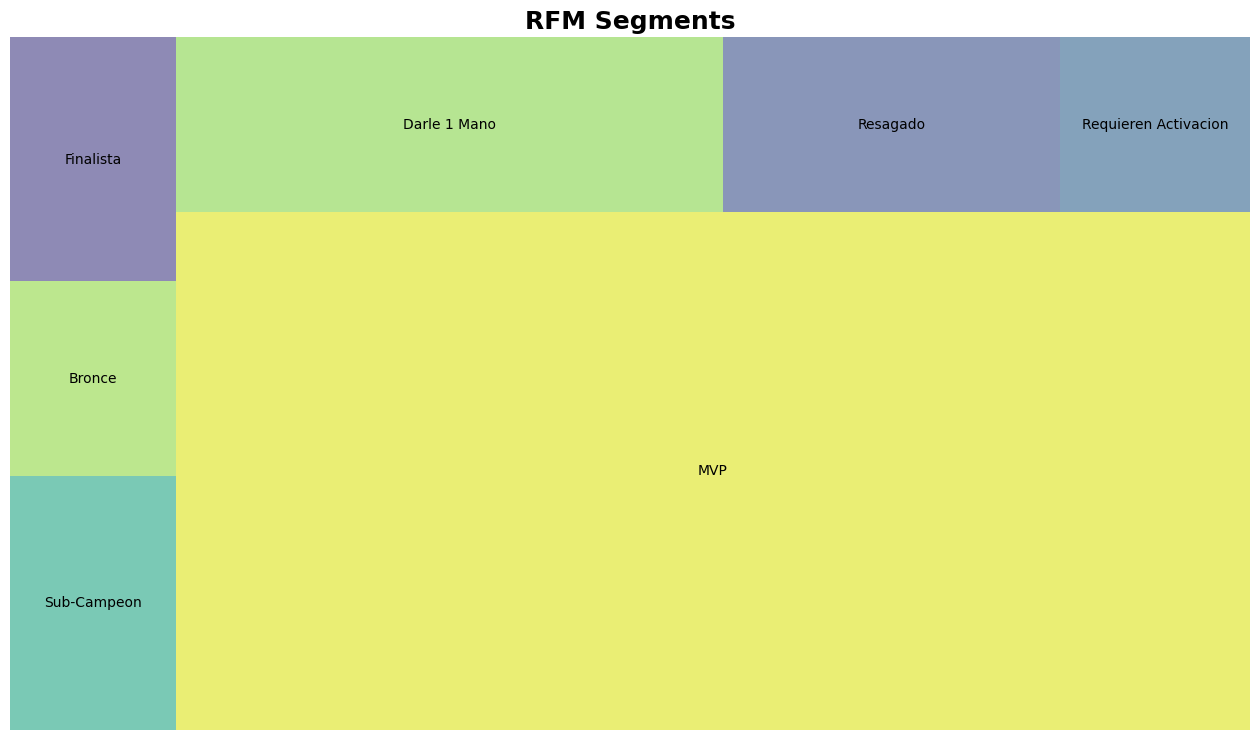

In [40]:
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','Monetary', 'Count']

# Gráfico de los segmento por nivel de RFM
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Sub-Campeon',
                     'Bronce',
                     'Finalista',
                     'MVP',
                     'Darle 1 Mano', 
                     'Resagado', 
                     'Requieren Activacion'], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [41]:
# Obtener un archivo completo de RFM que podamos posteriormente análisar
rfm_completo = rfm.merge(data_process_0, left_on='id', right_on='id')
rfm_completo[:10]

,Recency,Frequency,Monetary,R,F,M,RFM_Concat,RFM_Score,RFM_Level,date_condicionado,available,price_condicionado,price
id,,,,,,,,,,,,,
10803,1,164,8050.00,4,2,1,421,7,Bronce,1,164,8050.00,60.00
12936,1,365,50265.00,4,4,3,443,11,MVP,1,365,50265.00,160.00
38271,177,40,4665.00,3,1,1,311,5,Resagado,177,40,4665.00,150.00
43429,164,44,5418.00,3,1,1,311,5,Resagado,164,44,5418.00,178.00
44082,2,206,18334.00,4,3,2,432,9,MVP,2,206,18334.00,89.00
44699,33,146,12782.00,4,2,2,422,8,Sub-Campeon,33,146,12782.00,88.00
51592,1,285,79965.00,4,4,4,444,12,MVP,1,285,79965.00,359.00
66754,1,365,45395.00,4,4,3,443,11,MVP,1,365,45395.00,140.00
67211,165,150,7500.00,3,2,1,321,6,Cuarto Finalista,165,150,7500.00,50.00


In [42]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Concat,RFM_Score,RFM_Level
id,,,,,,,,,
10803,1,164,8050.00,4,2,1,421,7,Bronce
12936,1,365,50265.00,4,4,3,443,11,MVP
38271,177,40,4665.00,3,1,1,311,5,Resagado
43429,164,44,5418.00,3,1,1,311,5,Resagado
44082,2,206,18334.00,4,3,2,432,9,MVP
...,...,...,...,...,...,...,...,...,...
972269187445809189,1,362,21720.00,4,4,2,442,10,MVP
972605988949781261,1,281,28100.00,4,4,2,442,10,MVP
972670528635000851,1,221,53558.00,4,3,4,434,11,MVP


In [43]:
rfm_completo.to_csv(r'AirbnbRFM Output.csv')

# 6. Customer Segmentation

## 6.1. Prepare training dataframe

In [44]:
dfsegr = pd.merge(rfm_completo, dfl1f, on='id', how='inner')
dfsegr[:3]

,id,Recency,Frequency,Monetary,R,F,M,RFM_Concat,RFM_Score,RFM_Level,...,longitude,room_type,price_summary,min_night_summary,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,10803,1,164,8050.00,4,2,1,421,7,Bronce,...,144.98,Private room,49,5,173,2023-07-19,1.33,1,201,21
1,12936,1,365,50265.00,4,4,3,443,11,MVP,...,144.98,Entire home/apt,95,3,42,2020-03-15,0.26,10,0,0
2,38271,177,40,4665.00,3,1,1,311,5,Resagado,...,145.34,Entire home/apt,116,1,228,2023-08-26,1.47,1,325,36


In [45]:
dfsegr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19081 entries, 0 to 19080
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19081 non-null  int64         
 1   Recency                         19081 non-null  int64         
 2   Frequency                       19081 non-null  int64         
 3   Monetary                        19081 non-null  float64       
 4   R                               19081 non-null  category      
 5   F                               19081 non-null  category      
 6   M                               19081 non-null  category      
 7   RFM_Concat                      19081 non-null  object        
 8   RFM_Score                       19081 non-null  int64         
 9   RFM_Level                       19081 non-null  object        
 10  date_condicionado               19081 non-null  int64         
 11  av

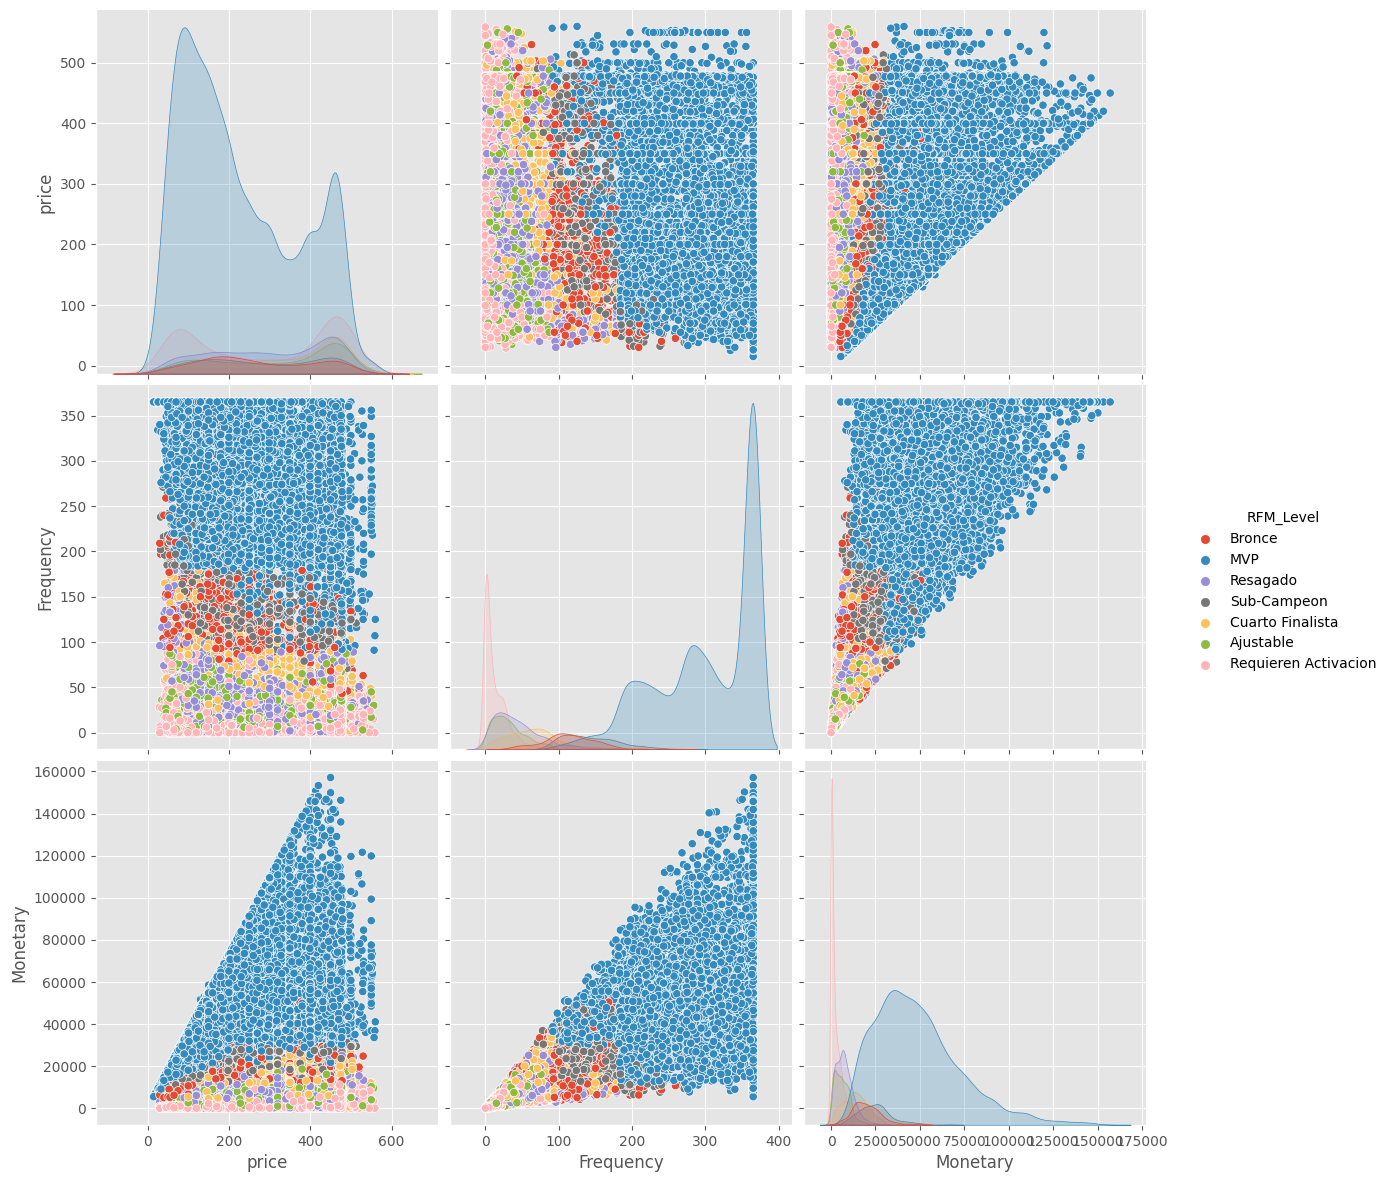

In [46]:
sb.pairplot(dfsegr.dropna(), hue='RFM_Level',size=4,vars=["price","Frequency","Monetary"],kind='scatter')

In [47]:
training_data_0 = dfsegr.copy()
training_data_1 = dfsegr.copy()

In [48]:
training_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19081 entries, 0 to 19080
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19081 non-null  int64         
 1   Recency                         19081 non-null  int64         
 2   Frequency                       19081 non-null  int64         
 3   Monetary                        19081 non-null  float64       
 4   R                               19081 non-null  category      
 5   F                               19081 non-null  category      
 6   M                               19081 non-null  category      
 7   RFM_Concat                      19081 non-null  object        
 8   RFM_Score                       19081 non-null  int64         
 9   RFM_Level                       19081 non-null  object        
 10  date_condicionado               19081 non-null  int64         
 11  av

In [60]:
columnas_0 = ['id', 'Recency','Frequency','Monetary']
training_0 = training_data_0[columnas_0].copy()

In [50]:
columnas_1 = ['price','room_type','min_night_summary', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'Recency', 'Frequency', 'Monetary']
training_1 = training_data_1[columnas_1].copy()

***otros cálculos***

In [ ]:
columnas_eliminar = 'R', 'F', 'M', 'price_summary'
data_process.drop('columnas_eliminar', axis=1, inplace=True)

## 6.2. Cluster Model - Training_0

In [76]:
import numpy as np

In [75]:
from pycaret.clustering import setup, create_model, assign_model, evaluate_model, save_model, load_model, plot_model, predict_model
import pandas as pd

ModuleNotFoundError: No module named 'pycaret.clustering'

In [72]:
clustering_setup = setup(data=training_0[['Recency', 'Frequency', 'Monetary']],
                         log_experiment=True,
                         log_plots=True,
                         normalize=True,
                         experiment_name='Experimento 0',
                         session_id=1,
                         verbose=True)


NameError: name 'setup' is not defined

In [ ]:
# Creación del modelo KMeans
kmeans_0 = create_model('kmeans',               # este kmeans es el modelo que quiero utilizar
                        algorithm='auto', 
                        init='k-means++', 
                        max_iter=300,
                        num_clusters=3,  # Instead of 'num_clusters', use 'n_clusters'
                        n_init=10, 
                        random_state=1, 
                        tol=0.0001, 
                        verbose=True
                       )

In [ ]:
kmeans_0

In [ ]:
kmeans_results = assign_model(kmeans_0)       

In [ ]:
cluster_summary = kmeans_results.groupby('Cluster').describe().transpose()
cluster_summary = cluster_summary.transpose()


cluster_summary.to_excel('AirbnbSegmento Output2.xlsx')
print(cluster_summary)

In [ ]:
kmeans_results.groupby('Cluster').sum()

In [ ]:
print(kmeans_0)

In [ ]:
#Revisamos elbow score para ver cuantos clusters necesitamos
plot_model(kmeans_0, plot="elbow")

In [ ]:
#Analizamos el grafico de silhouette por cluster label
plot_model(kmeans_0, plot="silhouette")

In [ ]:
plot_model(kmeans_0)
#plot_model(kmeans_0, plot='cluster')

In [ ]:
plot_model(kmeans_0, plot="distance")

In [ ]:
#Vemos cuantos hay por cada segmento
plot_model(kmeans_0, plot="distribution")

#### ***for clustered df***

In [ ]:
kmeans_results['id'] = training_0['id']
dfsegc = dfsegr.copy()
columnas_de_dfsegr = ['id', 'host_id', 'price','room_type','min_night_summary', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood', 'latitude', 'longitude', 'RFM_Level']
pre_clustered = dfsegc[columnas_de_dfsegr].copy()
dfclustered = pre_clustered.merge(kmeans_results, left_on = 'id', right_on = 'id')


In [ ]:
dfclustered.to_excel(r'Airbnb_dfclustered_Output2.xlsx', index=False)

***PowerBI file creation***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Especifica el tamaño de la figura antes de crear el boxplot
plt.figure(figsize=(10, 5))

# Reemplaza 'dfclustered' con el nombre real de tu DataFrame en Power BI
sns.boxplot(data=dfclustered, x='room_type', y='Monetary')

# Añadir etiquetas y título
plt.xlabel('Room Type')
plt.ylabel('Monetary')
plt.title('Boxplot de Monetary según Room Type')
plt.gca().yaxis.grid(True)
# Mostrar el gráfico
plt.show()



In [ ]:
dfclustered.info()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'dfclustered' con el nombre real de tu DataFrame en Power BI
sns.scatterplot(data=dfclustered, x='number_of_reviews', y='Monetary')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
plt.xlabel('Neighbourhood')
plt.ylabel('Monetary')
plt.title('Dispersión de Ganancias según Ubicación')
plt.show()


***Alternative methods***

In [ ]:
!pip install plotly

In [ ]:
kmeans_y = training_0.drop('id', axis=1)

In [ ]:
kmeans_x = KMeans(n_clusters=3, random_state=0).fit(kmeans_y)
kmeans_x.labels_


In [ ]:
np.unique(kmeans_x.labels_,return_counts=True)

In [ ]:
kmeans_x.cluster_centers_

In [ ]:
import plotly.express as px

fig = px.scatter_3d(training_0, x='Recency', y='Frequency', z='Monetary', color=kmeans_x.labels_, size_max=10)
fig.update_layout(scene=dict(zaxis=dict(nticks=4, range=[0, training_0['Monetary'].max()])))
fig.show()


In [ ]:
# valor_price = dfcalf.loc[dfcalf['id'] == 10318885, 'price'].values[0]
valor_price

***6.3. Cluster Model Training_1***

In [ ]:
from pycaret.clustering import *
# Configuración de PyCaret

clustering_setup = setup(data = training_1,
                         log_experiment = True,
                         log_plots = True,
                         normalize = True,
                         experiment_name = 'Experimento 1',
                         session_id = 1,
                         verbose=True
                        )

In [ ]:
# Creación del modelo KMeans
kmeans_1 = create_model("kmeans", algorithm='auto', 
                      init='k-means++', 
                      max_iter=300,
                      num_clusters=3, 
                      n_init=10, 
                      random_state=1, 
                      tol=0.0001, 
                      verbose=True
                     )

In [ ]:
#Revisamos elbow score para ver cuantos clusters necesitamos
plot_model(kmeans_1, plot="elbow")

In [ ]:
#Analizamos el grafico de silhouette por cluster label
plot_model(kmeans_1, plot="silhouette")

In [ ]:
plot_model(kmeans_1)

In [ ]:
plot_model(kmeans_1, plot="distance")

In [ ]:
#Vemos cuantos hay por cada segmento
plot_model(kmeans_1, plot="distribution")

## 6.4.  Listing Prediction per Clusters


In [78]:
predict_data_0 = training_0.copy()

In [79]:
kmeans_predictions_0 = predict_model(kmeans, data = predict_data_0)
kmeans_predictions_0.head(10)

NameError: name 'predict_model' is not defined

In [ ]:
kmeans_predictions_0 = kmeans_predictions_0.iloc[:, -1]

In [ ]:
result_0 = pd.concat([training_0, kmeans_predictions_0], axis=1)
result_0[:3]

In [ ]:
print(result_0.groupby('Cluster').size())

In [ ]:
result_0.to_csv(r'AirbnbSegmentación Output.csv')

In [81]:
# el 20% de clientes que dan el 80% de la utilidad --> ver Host 
    from matplotlib.ticker import PercentFormatter
    df.index = ["Dose missed", "Wrong time", "Wrong drug", "Over dose", "Wrong patient", "Wrong route", "Wrong calculation", "Duplicated drugs", "Under dose", "Wrong IV rate", "Technique error", "Unauthorized drug"]
    df = df.sort_values(by='error', ascending=False)
    df["cum_percentage"] = round(df["error"].cumsum()/df["error"].sum()*100,2)
    df

IndentationError: unexpected indent (793753955.py, line 2)